# Task 5 - To explore Business Analytics
## Perform ‘Exploratory Data Analysis’ on the provided dataset ‘SampleSuperstore’
### You are the business owner of the retail firm and want to see how your company is performing. You are interested in finding out the weak areas where you can work to make more profit.What all business problems you can derive by looking into the data? You can choose any of the tool of your choice (Python/R/Tableau/PowerBI/Excel)


## By: Kailash Singh

### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

### Importing Dataset

In [2]:
df = pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


#### Shape

In [3]:
df.shape

(9994, 13)

#### Checking NA's

In [4]:
na = df.isnull().sum()
print(na[na > 0])

Series([], dtype: int64)


# 1. EDA

#### Checking Duplicates

In [5]:
df.duplicated().sum()

17

In [6]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

#### Unique Columns Entries

In [7]:
for i in df:
    print(df[i].unique())
    print('=======================')

['Second Class' 'Standard Class' 'First Class' 'Same Day']
['Consumer' 'Corporate' 'Home Office']
['United States']
['Henderson' 'Los Angeles' 'Fort Lauderdale' 'Concord' 'Seattle'
 'Fort Worth' 'Madison' 'West Jordan' 'San Francisco' 'Fremont'
 'Philadelphia' 'Orem' 'Houston' 'Richardson' 'Naperville' 'Melbourne'
 'Eagan' 'Westland' 'Dover' 'New Albany' 'New York City' 'Troy' 'Chicago'
 'Gilbert' 'Springfield' 'Jackson' 'Memphis' 'Decatur' 'Durham' 'Columbia'
 'Rochester' 'Minneapolis' 'Portland' 'Saint Paul' 'Aurora' 'Charlotte'
 'Orland Park' 'Urbandale' 'Columbus' 'Bristol' 'Wilmington' 'Bloomington'
 'Phoenix' 'Roseville' 'Independence' 'Pasadena' 'Newark' 'Franklin'
 'Scottsdale' 'San Jose' 'Edmond' 'Carlsbad' 'San Antonio' 'Monroe'
 'Fairfield' 'Grand Prairie' 'Redlands' 'Hamilton' 'Westfield' 'Akron'
 'Denver' 'Dallas' 'Whittier' 'Saginaw' 'Medina' 'Dublin' 'Detroit'
 'Tampa' 'Santa Clara' 'Lakeville' 'San Diego' 'Brentwood' 'Chapel Hill'
 'Morristown' 'Cincinnati' 'Inglewood' 

**From above output we can remove the Country column and Postal Code coz it is only a single entry present**

In [8]:
df=df.drop(['Country', 'Postal Code'], axis=1)

#### Correlation Plot

<AxesSubplot:>

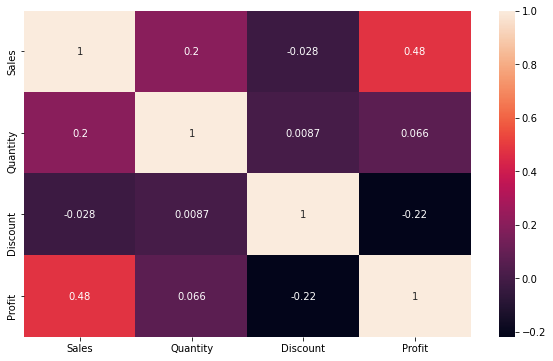

In [9]:
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(),annot=True)

**None of the value is stronger**

In [10]:
df_con=df.select_dtypes(include=[np.number])

#### Boxplot

<AxesSubplot:>

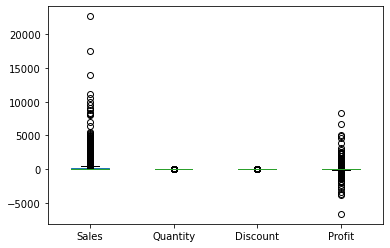

In [11]:
df_con.plot(kind='box')

#### Removing Outliers

In [12]:
def remove_outlier(dataset,k=3.33):
    for col in dataset.columns:
            if (dataset[col].dtype=="int64" or dataset[col].dtype=="float64"):
                mean = dataset[col].mean()
                global ds      
                std = dataset[col].std()    
                outlier = [i for i in dataset[col] if (i > mean - k * std)]
                outlier = [i for i in outlier if (i < mean + k * std)]       
                ds = dataset.loc[dataset[col].isin(outlier)]

**In this function we used normalization techniques Mean, Std Dev (0,1)**

In [13]:
remove_outlier(df,k=3.33)

<AxesSubplot:>

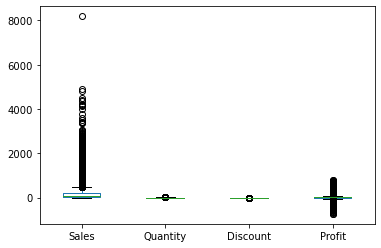

In [14]:
ds_con=ds.select_dtypes(include=[np.number])
ds_con.plot(kind='box')

#### Shape after removing entries

In [15]:
ds.shape

(9889, 11)

# 2. Data Visualization

### 

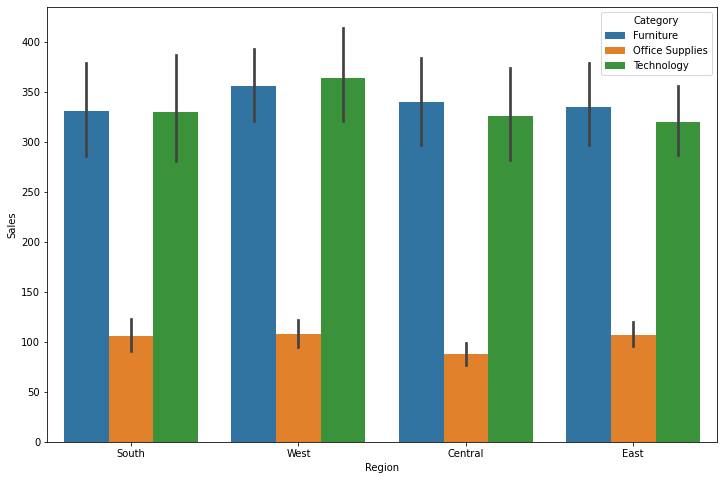

In [16]:
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Region", y="Sales", hue="Category", data=ds)

**In every region, except the office Supplies rest of the categoreis are sold more**

### 

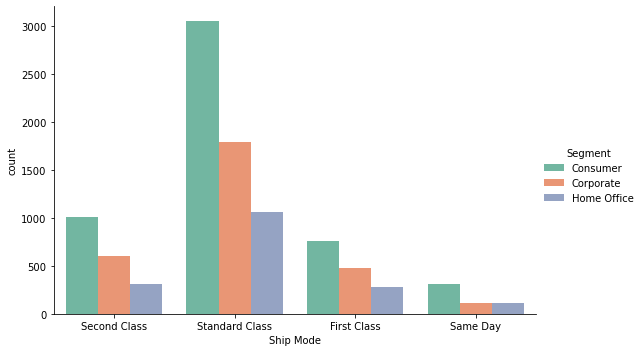

In [17]:
sns.catplot("Ship Mode", hue="Segment", data=ds, kind="count", aspect=1.5, palette = 'Set2')

**Preferred Class is Standard**

### 

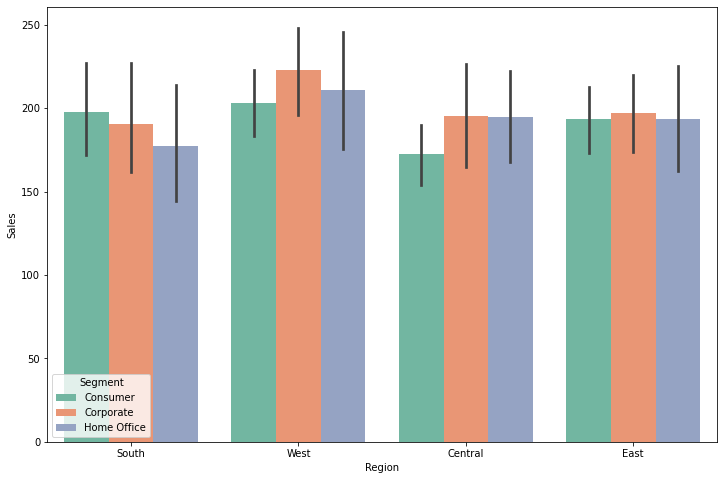

In [18]:
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Region", y="Sales", hue="Segment", data=ds, palette="Set2")

**Almost at every region all segement is high but** ***Corporate Segment*** **is leading one**

### 

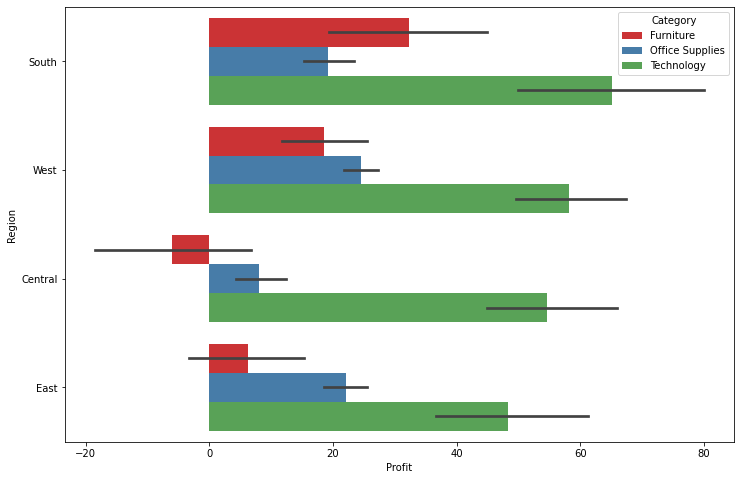

In [19]:
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Profit", y="Region", hue="Category", data=ds, palette = 'Set1')

**Exceptionally only Central Region posses loss and in** ***Furniture Category*** **where as Technology Category is a dominator in every region**

### 

# 3. Grasping Stats

### 

#### Grouping by Sales with respect to Cities

In [20]:
grouped= ds.groupby("City")
agg_sales=grouped['Sales'].agg(np.sum).sort_values(ascending=False).reset_index()

#### Top 10 Cities

In [21]:
agg_sales.head(10)

,City,Sales
0,New York City,197246.0230
1,Los Angeles,164434.5490
2,San Francisco,109777.2120
3,Seattle,96250.4880
4,Philadelphia,91772.8490
5,Houston,60635.6664
6,San Diego,47521.0290
7,Chicago,43083.4330
8,Columbus,38424.8710
9,Springfield,34001.4870


In [22]:
agg_sales.tail(3)

,City,Sales
528,Jupiter,2.064
529,Elyria,1.824
530,Abilene,1.392


#### Grouping by Profit with respect to Cities

In [23]:
agg_prof=grouped['Profit'].agg(np.sum).sort_values(ascending=False).reset_index()

In [24]:
agg_prof.head(10)

,City,Profit
0,New York City,39934.8107
1,Los Angeles,26544.4140
2,Seattle,18916.8467
3,San Francisco,16521.1321
4,Detroit,8200.3235
5,San Diego,6377.1960
6,Columbus,5909.1601
7,Richmond,5567.2486
8,Columbia,5304.0100
9,Henderson,4911.8609


In [25]:
agg_prof.tail(3)

,City,Profit
528,Chicago,-3449.9438
529,Houston,-3790.4016
530,Philadelphia,-11487.8346


## 
1. Cities Like NYC & LA posses high Sales and profits
2. Chicago, Houston & Phili has negative profits as over consuming the profits

### 

#### Grouping by Discount with respect to Cities

In [26]:
agg_dist=grouped['Discount'].agg(np.sum).sort_values(ascending=False).reset_index()

In [27]:
agg_dist.head(10)

,City,Discount
0,Philadelphia,173.50
1,Houston,139.54
2,Chicago,117.90
3,Dallas,55.50
4,Los Angeles,54.70
5,New York City,50.40
6,Columbus,38.20
7,Jacksonville,35.35
8,San Francisco,33.80
9,Seattle,27.40


#### Grouping by Sales with respect to Cities

In [28]:
avg_sales=grouped['Sales'].agg(np.mean).sort_values(ascending=False).reset_index()

In [29]:
avg_sales.head(10)

,City,Sales
0,Cheyenne,1603.136000
1,Bellingham,1263.413333
2,Independence,1208.685000
3,Burbank,1082.386000
4,Buffalo,906.349600
5,Beverly,861.063333
6,Sparks,853.986667
7,Appleton,835.655000
8,Torrance,783.067000
9,Noblesville,772.795000


In [30]:
avg_sales.tail(3)

,City,Sales
528,Jupiter,2.064
529,Elyria,1.824
530,Abilene,1.392


**Cities like Cheyenne, Bellingham are leading in sales, company should open more stores at there where as Elyria, Abilene are at bottom**  

#### Average Profit per city

In [31]:
avg_profit=grouped['Profit'].agg(np.mean).sort_values(ascending=False).reset_index()

In [32]:
avg_profit.head(5)

,City,Profit
0,Independence,487.831500
1,Appleton,277.383150
2,Burbank,254.844600
3,Lehi,225.831300
4,Beverly,218.306467


In [33]:
avg_profit.tail(5)

,City,Profit
526,Rockford,-104.500709
527,Normal,-110.023200
528,Yuma,-116.497725
529,Oswego,-178.709200
530,Champaign,-182.352000


### State Wise profit

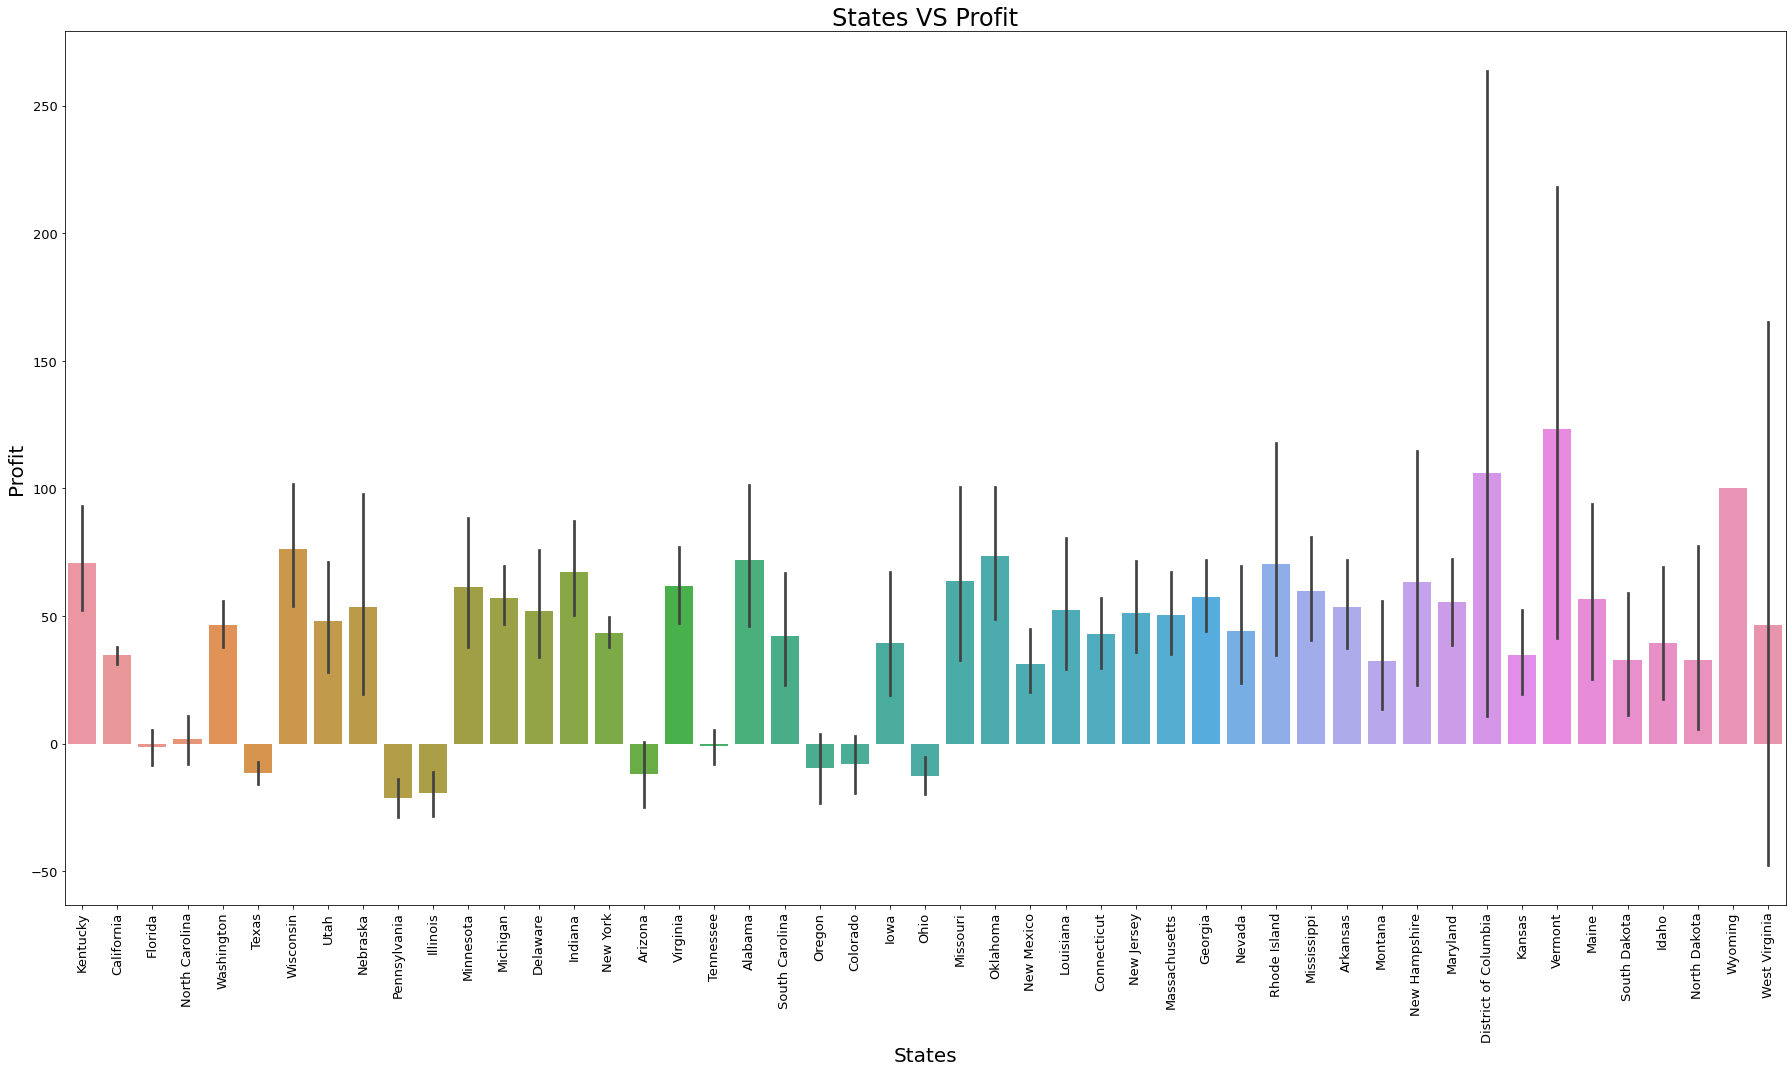

In [34]:
plt.figure(figsize=[25,15])
ax = sns.barplot(x="State", y="Profit", data=ds)
plt.xticks(rotation=90, fontsize=13)
plt.yticks(fontsize=13)
plt.title("States VS Profit",fontsize=24)
plt.xlabel("States",fontsize=20)
plt.ylabel("Profit",fontsize=20)
plt.tight_layout()

1. States like 'District of Columbia', 'Vermont','Wyoming' states are generating highest profits.
2. States like 'Texas', 'Pennsylvania','Illinois','Arizona','Oregon','Colorado','Ohio' are generating losses.

### Region Wise Profit

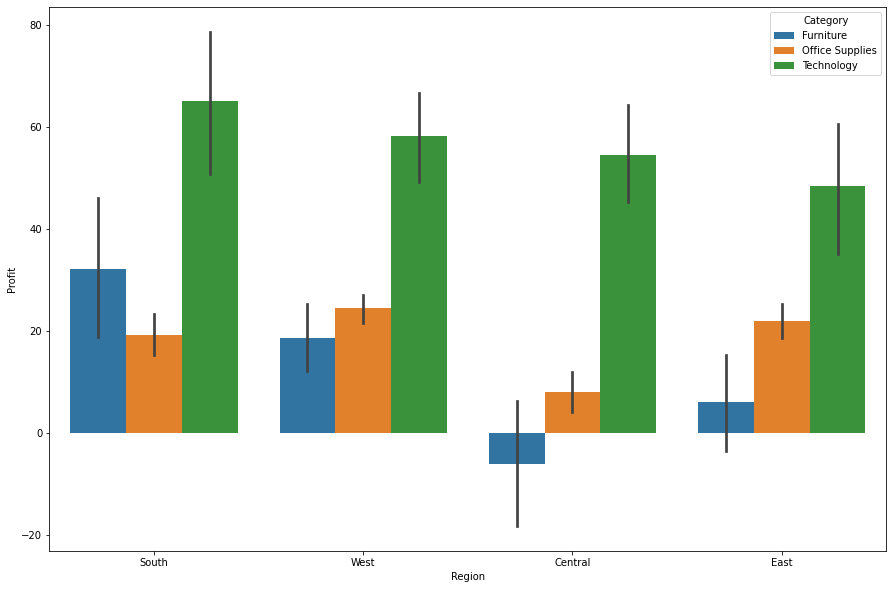

In [35]:
plt.figure(figsize=[15,10])
ax = sns.barplot(x="Region", y="Profit", hue="Category", data=ds)

**Furniture Category is struggling at every region whereas Technology is a leader.**

### Subcategory wise Profit

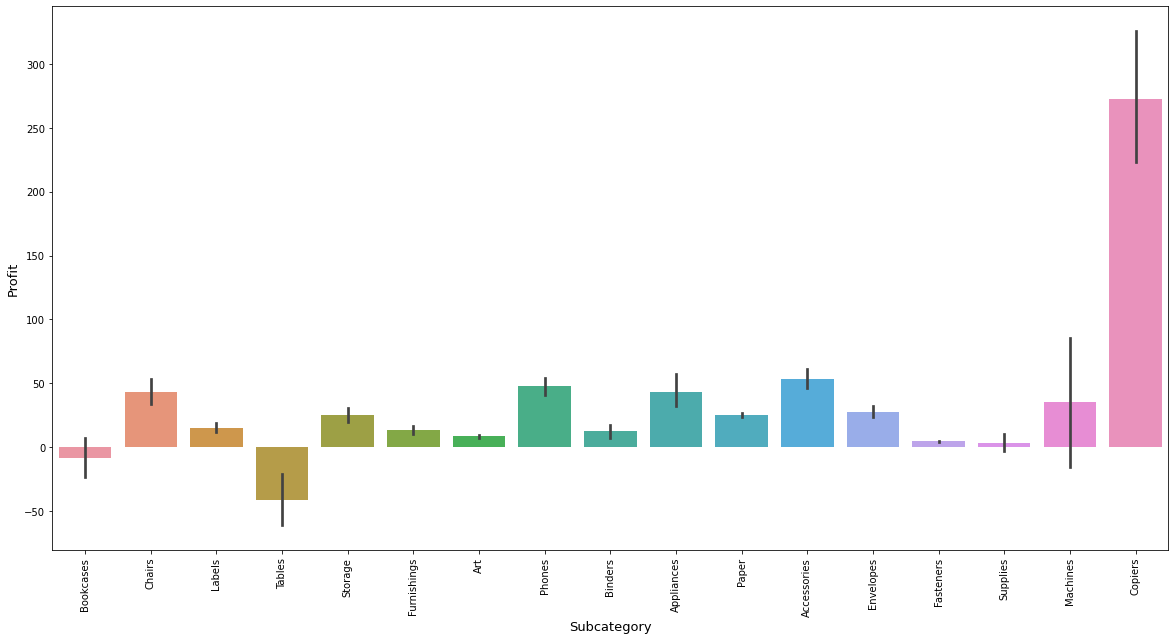

In [36]:
plt.figure(figsize=[20,10])
ax = sns.barplot(x="Sub-Category", y="Profit", data=ds)
plt.xlabel("Subcategory", fontsize=13)
plt.ylabel("Profit",fontsize=13)
plt.xticks(rotation=90)
plt.show()


**Some Subs like Tables, Bookcases are consuming profits whereas their solo profit is generated by Copiers**

# Outcomes

1. Cities, like New York, Los Angeles, Seatle, San Francisco are generating highest amount of Sales as well as Profit.
2. In case of Categories, Technology is always leading in terms of Sales and Profit.
3. Some cities are also consuming the profits, maybe closing the stores at there can be a idea